In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/train_df.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_df.csv')

In [3]:
train_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
search_id,10655.00000,10655.0,10655.0,10655.0,10655.0,10655.0,10655.0,10655.0,10655.0,10655.0
feature_0,9.00000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
feature_1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_3,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
feature_75,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_76,0.03674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_77,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_78,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(train_df.shape, test_df.shape)

(15081, 81) (1529, 81)




*   search_id - id группы, которая связана с объектом
*   feature_0-78 - признаки этих объектов
*   target - клик по эотму объекту



In [4]:
train_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
train_df.target.value_counts(normalize=True)

0    0.977763
1    0.022237
Name: target, dtype: float64

Дисбаланс классов

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
search_id,15081.0,254806.827465,142374.568081,116.0,134823.00000,255859.00000,376175.0000,496975.000000
feature_0,15081.0,9.000000,0.000000,9.0,9.00000,9.00000,9.0000,9.000000
feature_1,15081.0,0.193754,0.626654,0.0,0.00000,0.00000,0.0000,3.000000
feature_2,15081.0,0.464293,1.183076,0.0,0.00000,0.00000,0.0000,6.000000
feature_3,15081.0,0.629865,0.482857,0.0,0.00000,1.00000,1.0000,1.000000
...,...,...,...,...,...,...,...,...
feature_75,15081.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0000,0.000000
feature_76,15081.0,0.297465,0.311962,0.0,0.03674,0.17614,0.5291,1.000020
feature_77,15081.0,0.030543,0.112984,0.0,0.00000,0.00000,0.0000,0.846272
feature_78,15081.0,0.031207,0.115598,0.0,0.00000,0.00000,0.0000,0.908132


In [12]:
import matplotlib.pyplot as plt

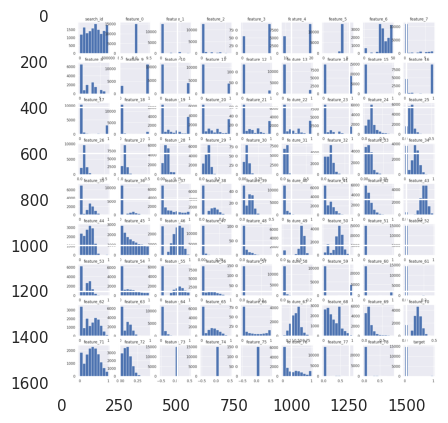

In [14]:
image = plt.imread('train_df.png')
plt.imshow(image)

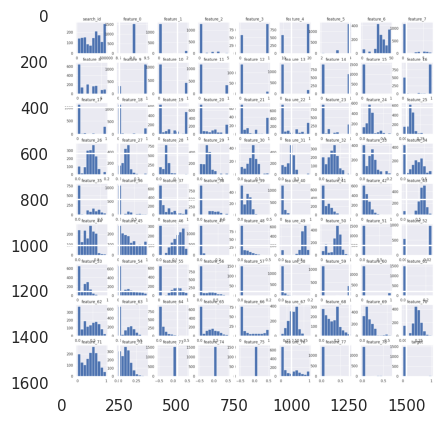

In [15]:
image = plt.imread('test.png')
plt.imshow(image)

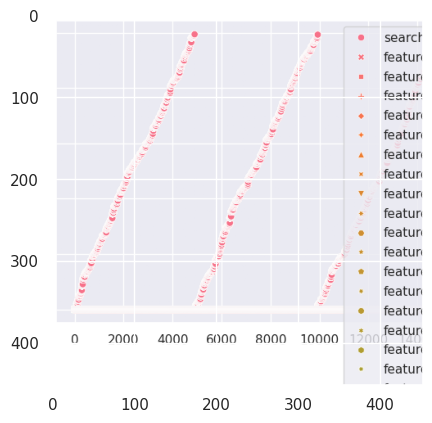

In [16]:
image = plt.imread('train.png')
plt.imshow(image)

In [ ]:
sns.pairplot(train_df)

Есть небольшое отклонение распределения между тестовыми и тренировочными данными

In [ ]:
train_df.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

* feature_0,73,74,75 нулевые
* feature_3,4 абсолютно одинаковые
* feature_77,78 сильно коррелируют
* feature_71,72 сильно коррелируют

In [ ]:
# del_cols = ['feature_0', 'feature_73', 'feature_74', 'feature_75', 'feature_3']
# train_df = train_df.drop(del_cols, axis=1)

In [ ]:
# ids = train_df['search_id'].values

In [ ]:
# df = train_df.groupby('searcch_id')

1000

In [ ]:
# data = data.groupby('eeg_id')[META+TARGETS].agg({**{m:'first' for m in META},**{t:'sum' for t in TARGETS}}).reset_index()

Нормируем данные

In [ ]:
def norm(column, eps=1e-6):
    mean = column.mean()
    std = column.std()
    column = (column-mean)/(std+eps)

    return column

In [ ]:
for col in train_df.columns.values[1:-1]:
    train_df[col] = norm(train_df[col])

для подбора параметров,например, для CatBoost можно использовать optuna

Для генерации новых features PolynomialFeatures

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train1 = train_df[train_df.target == 1]
train0 = train_df[train_df.target == 0]

features = ["feature_" + str(i) for i in range(79)]
for f in del_cols:
  features.remove(f)

poly = PolynomialFeatures(2)
train11 = poly.fit_transform(train1[features].T).T

train1 = pd.DataFrame(train11, columns=features)
train1["target"] = 1
train1["search_id"] = range(train1.shape[0])

train0["search_id"] = range(train1.shape[0], train1.shape[0]+train0.shape[0])
train_df = pd.concat([train1, train0])

Для понижения размерности можно использовать SVD, PCA